# This code represents an implementation of the k-Means algorithm using GreedyKCenters Algorithm without using libraries that would give us the clusters directly

In [3]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd

from sklearn.metrics.pairwise import euclidean_distances

In [40]:
data1.sample(1)

,0,1
769,0.34586,1.1651


In [43]:
data1 = pd.read_csv("C:/Users/rajku/Desktop/Anaconda/clustering.csv", header = None)
data2 = pd.read_csv("C:/Users/rajku/Desktop/Anaconda/ShapedData.csv", header = None)


In [70]:
def greedykcenters( data1, k ):
    

    copy = data1.copy()    
    Init_center = copy.sample( 1 )
    copy.drop(Init_center.index,inplace = True)
    copy.index = list(range( copy.shape[0] ) )
    
    while Init_center.shape[0] < k:
        
        #Get index of data point that has maximum minimum distance from any center
        ind = np.argmax(np.amin( euclidean_distances(copy, Init_center), axis=1 ))
        
        #Append data in temp_df at index ind into C
        Init_center = Init_center.append( copy.loc[ind] )
        
        #Remove that row from temp_df
        copy.drop(ind,inplace = True)
        #and change indices to 0,1,2,...,n-1
        copy.index = list( range( copy.shape[0] ) )
    del copy
    return( Init_center, np.amax(np.amin(euclidean_distances( data1, Init_center ), axis=1 )) )

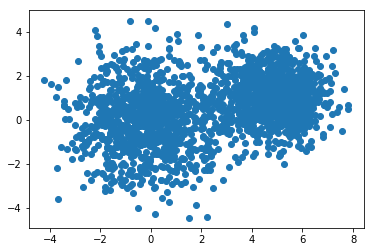

In [71]:
plt.scatter(data1[0],data1[1])
plt.show()

In [79]:
centers, dist_cost = greedykcenters( data1, 2 )
print("Centers:", pd.DataFrame(centers))
print("Cost:", dist_cost)

Centers:            0       1
1824  4.8003  1.1629
642  -3.6773 -3.5965
Cost: 7.59370316842


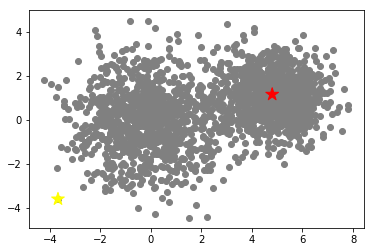

In [80]:
plt.scatter(data1[0], data1[1], color = 'grey')
plt.scatter(centers[0],centers[1], marker = "*", color = ['red', 'yellow'], s =180)
plt.show()

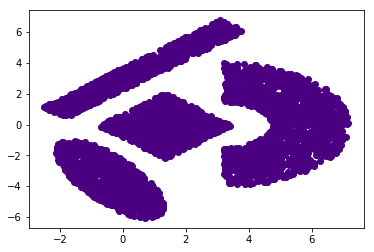

In [81]:
plt.scatter(data2[0],data2[1], color = 'indigo')
plt.show()

In [82]:
centers2, dist_cost2 = greedykcenters( data2, 4 )
print("Centers:", pd.DataFrame(centers2))
print("Cost:", dist_cost2)

Centers:             0        1
1689 -0.61108 -4.84220
2576  3.08110  6.75650
1975  7.09040 -0.82791
655  -1.66750  1.88330
Cost: 4.79757825349


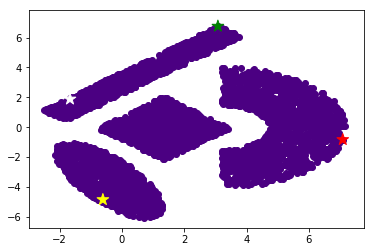

In [84]:
norm = plt.Normalize()
plt.scatter(data2[0], data2[1], color = 'indigo')
plt.scatter(centers2[0],centers2[1], marker = "*", color = ['yellow', 'green','red','white'], s =150)
plt.show()

Centers:            0        1
790  -1.8413  0.39752
1710  7.8132  0.51561
Cost: 6.30964297757


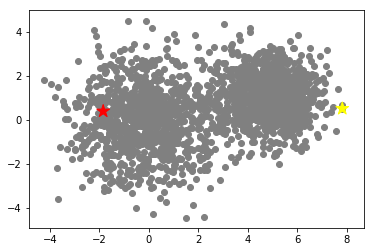

Centers:            0       1
1310  4.6164  1.1349
642  -3.6773 -3.5965
567  -2.1987  4.1088
395   2.2232 -4.4286
Cost: 4.7906643799


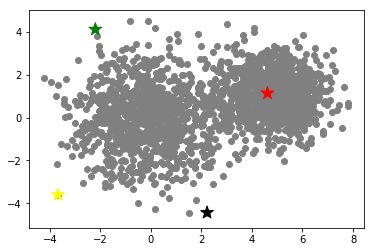

Centers:             0        1
1445  4.82450  0.77495
642  -3.67730 -3.59650
567  -2.19870  4.10880
395   2.22320 -4.42860
99   -0.12982 -0.25562
Cost: 4.06952484696


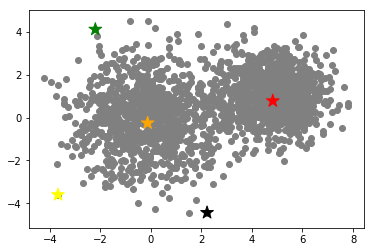

Centers:             0       1
742  -0.74826 -1.2698
1727  7.19760  3.1657
259  -0.11359  4.5185
1586  5.26480 -2.0143
369  -4.21480  1.8237
1852  2.99780  1.6860
481   1.51810 -4.4392
Cost: 3.74069622017


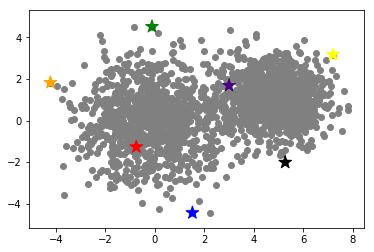

Centers:             0        1
586   0.36279  1.13290
1710  7.81320  0.51561
641  -3.67730 -3.59650
395   2.22320 -4.42860
1124  4.08930  4.16360
370  -4.21480  1.82370
1118  4.17080 -1.00900
866  -0.83288  4.48190
Cost: 3.43666507837


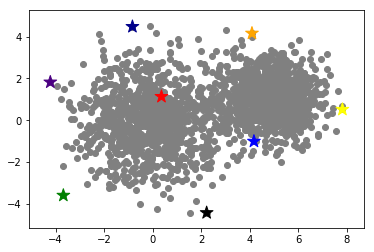

Centers:             0        1
726   0.15502  0.95917
1710  7.81320  0.51561
642  -3.67730 -3.59650
395   2.22320 -4.42860
1124  4.08930  4.16360
370  -4.21480  1.82370
1518  3.90710 -0.47097
866  -0.83288  4.48190
234  -0.39902 -2.33820
Cost: 2.89285421299


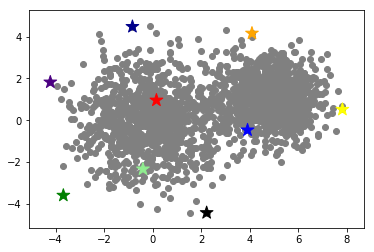

In [88]:
k = [2,4,5,7,8,9]
for i in k:
    centers, dist_cost = greedykcenters( data1, i )
    print("Centers:", pd.DataFrame(centers))
    print("Cost:", dist_cost)
    plt.scatter(data1[0], data1[1], color = 'grey')
    plt.scatter(centers[0],centers[1], marker = "*", color = ['red', 'yellow','green','black', 'orange','indigo', 'blue', 'darkblue', 'lightgreen', 'purple'], s =180)
    plt.show()
    

# SINGLE SWAP HEURISTIC

In [118]:
def ss_centers( data, k ):
       
    centers,dist = greedykcenters( data, k )
        
    C0 = pd.DataFrame(euclidean_distances( data, centers )).min(axis=1).sum()
    print("Gk centers cost= ", C0)

    counter = centers.shape[0]
    
    beginning = False
    
    while counter > 0:
        
        for i in range( centers.shape[0] ):  
            if beginning == True:
                beginning = False
                break
                
            #Create a copy of the dataframe df without the centers Q
            copy = pd.concat( [data,centers] )
            copy.drop_duplicates(keep=False)
            copy.index = list( range( copy.shape[0] ) )
            
            #Swap
            while copy.shape[0] != 0:
                centers_new = pd.concat( [ centers.drop(centers.index[i]), copy.loc[[0]] ] )
                
                #Get cost of new centers
                Cost_new =  pd.DataFrame(euclidean_distances( data, centers_new )).min(axis=1).sum()

                #Check for reduced cost of more than gamma(which is taken to be 0.05)
                if Cost_new <= 0.95 * C0:
                    print('1')
                    centers = centers_new.copy()
                    print("SS_cost= ", Cost_new)
                    copy = pd.concat( [data,centers] )
                    copy.drop_duplicates(keep=False)
                    copy.index = list( range( copy.shape[0] ) )
                    beginning = True
                    counter = centers.shape[0] 
                    break
                else:
                    copy.drop(0, inplace=True)
                    copy.index = list( range( copy.shape[0] ) )
            if beginning == False:
                print(counter)
                counter -= 1
    
    #Return the centers
    return( centers )

In [119]:
sscenters = ss_centers(data1,2)

Gk centers cost=  5092.9147914499545
1
SS_cost=  4832.787029261447
1
SS_cost=  4562.724811289025
2
1


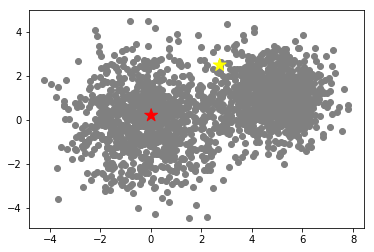

In [120]:
plt.scatter(data1[0], data1[1], color = 'grey')
plt.scatter(sscenters[0],sscenters[1], marker = "*", color = ['red', 'yellow'], s =180)
plt.show()

In [ ]:
sscenters2 = ss_centers(data2,2)

In [ ]:
plt.scatter(data2[0], data2[1], color = 'grey')
plt.scatter(sscenters2[0],sscenters2[1], marker = "*", color = ['red', 'yellow'], s =180)
plt.show()